<a href="https://colab.research.google.com/github/ysamia/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease prediction

Installing and opening datasets

In [381]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [382]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [383]:
import opendatasets as od
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##Downloading the data

In [384]:
od.download('https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction')

Skipping, found downloaded files in "./heart-disease-prediction" (use force=True to force download)


In [385]:
os.listdir('heart-disease-prediction')

['Heart_Disease_Prediction.csv']

In [386]:
raw_df=pd.read_csv('heart-disease-prediction/Heart_Disease_Prediction.csv')

In [387]:
raw_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [388]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

###Here there are no null values 

In [389]:
px.histogram(raw_df,x='Age', title='Age vs. Heart Disease',color='Heart Disease')

In [390]:
px.pie(raw_df,names='Heart Disease',title='percentage of Heart Disease')

In [391]:
px.histogram(raw_df,x='Sex', title='Sex vs. Heart Disease', color='Heart Disease')

In [392]:
px.histogram(raw_df, x='Chest pain type', title='chest Pain Type vs. Heart Disease',color='Heart Disease')

In [393]:
px.histogram(raw_df, x='Cholesterol',color='Heart Disease', title='Cholestral vs. Heart Disease')

In [394]:
px.histogram(raw_df,x='Max HR', color='Heart Disease', title='Max HR vs. Heart Disease')

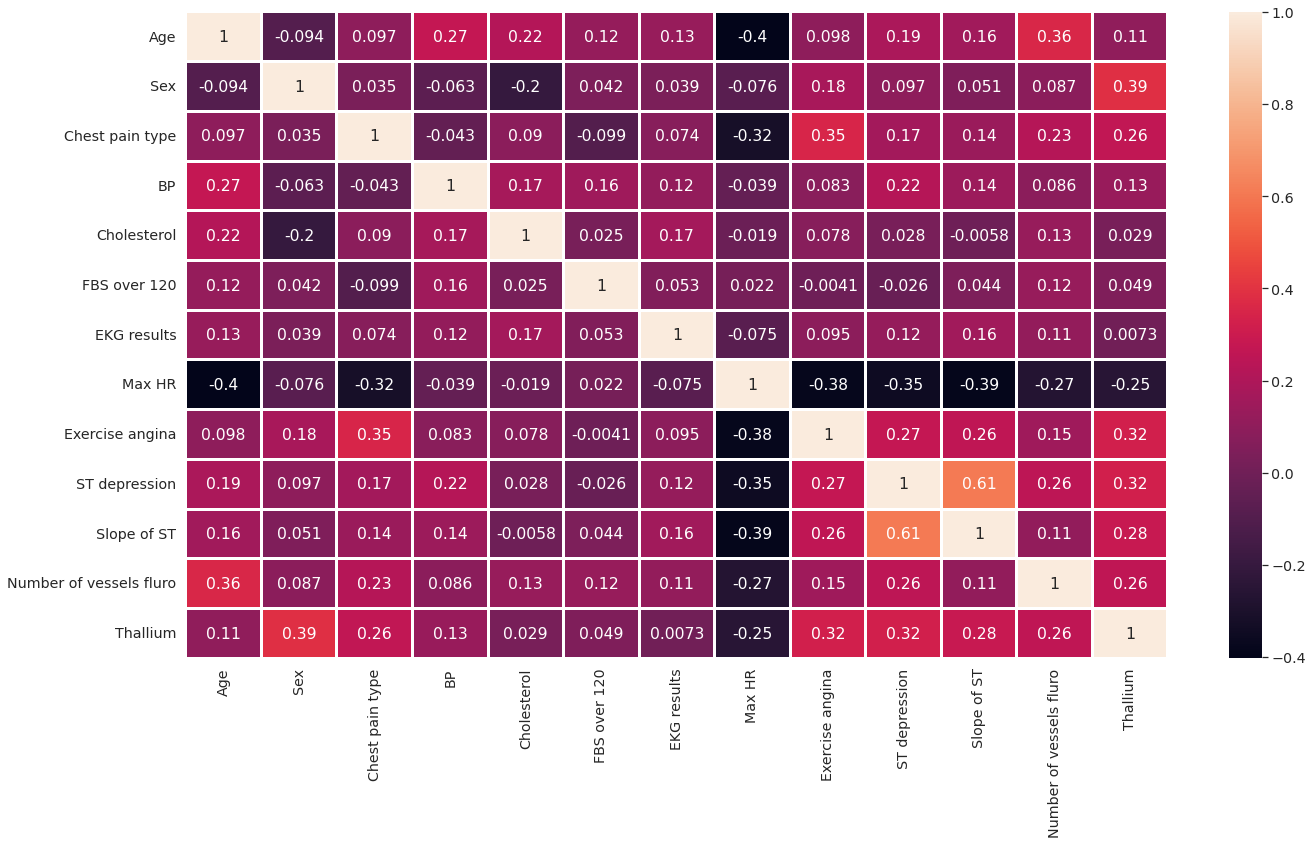

In [395]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(raw_df.corr(),annot=True,linewidth =2)
plt.tight_layout()


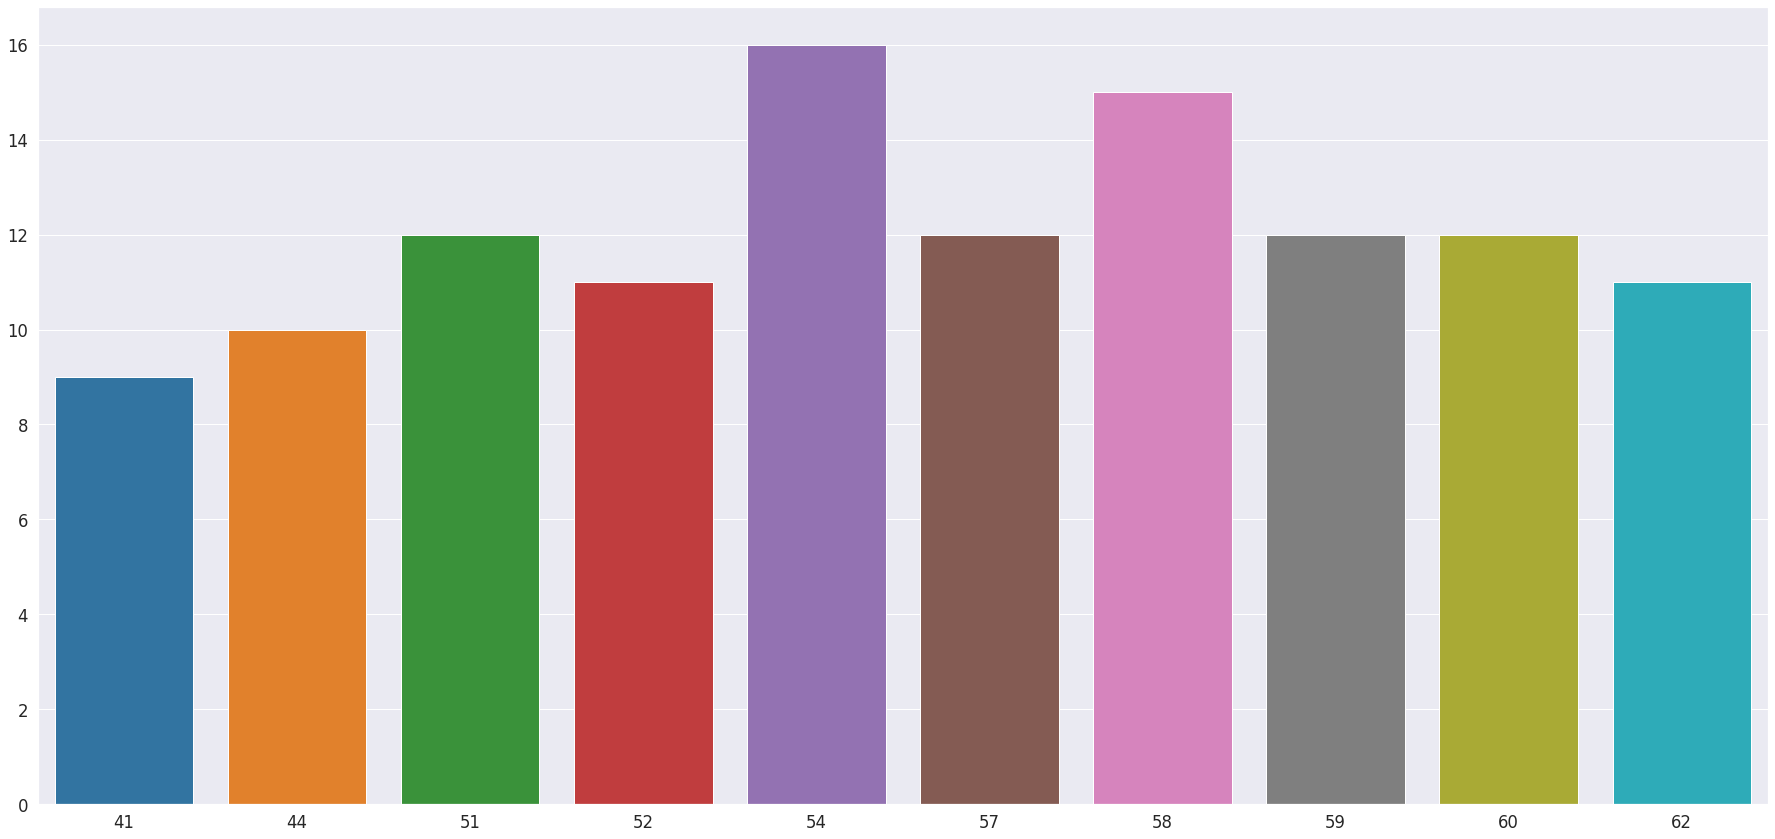

In [396]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=raw_df.Age.value_counts()[:10].index,y=raw_df.Age.value_counts()[:10].values)
plt.tight_layout()

In [397]:
minAge=min(raw_df.Age)
maxAge=max(raw_df.Age)
meanAge=raw_df.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43333333333333


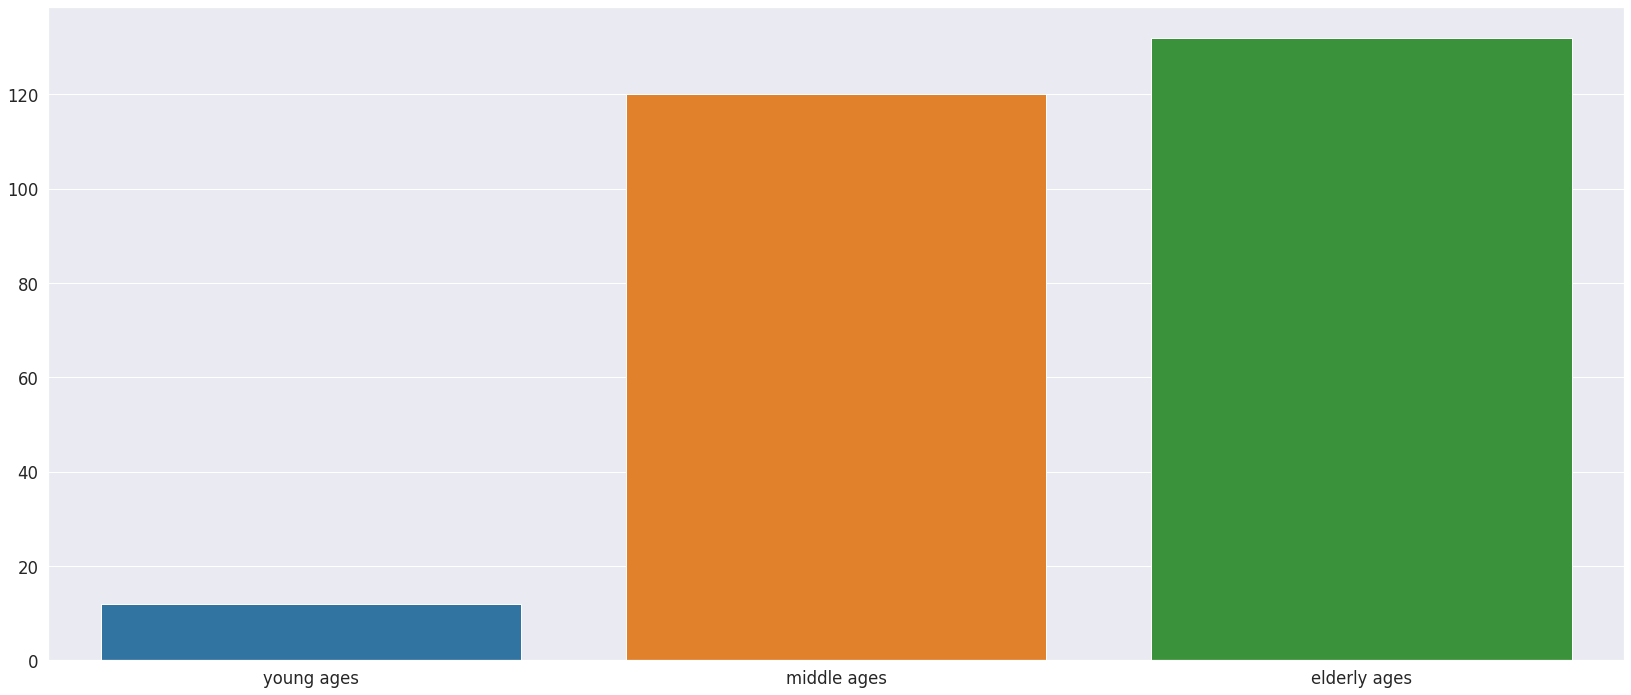

In [398]:
Young = raw_df[(raw_df.Age>=29)&(raw_df.Age<40)]
Middle = raw_df[(raw_df.Age>=40)&(raw_df.Age<55)]
Elder = raw_df[(raw_df.Age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

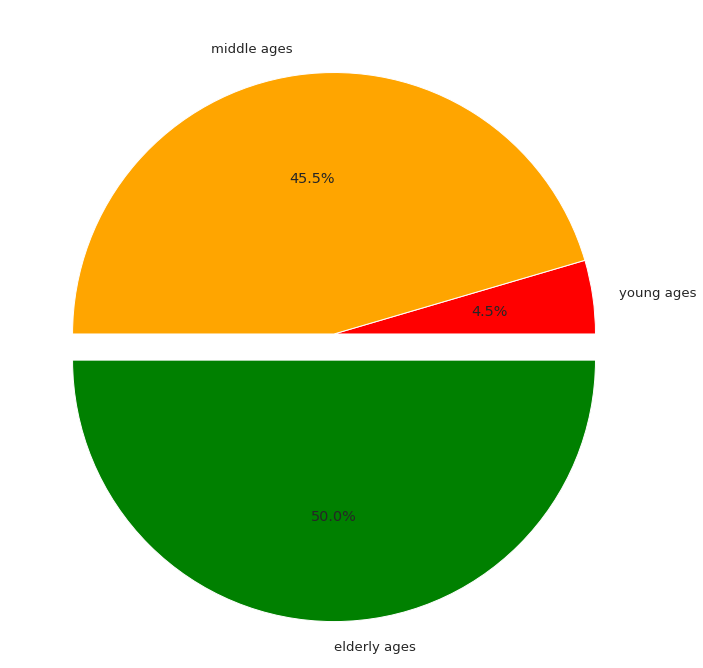

In [399]:
colors = ['red','orange','green']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

Sex feature analysis

In [400]:
raw_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [401]:
px.pie(raw_df,names='Sex',title='percentage of Male and female')

chest pain types

In [402]:
px.pie(raw_df,names='Chest pain type',title='percentage of each type of chest pain')

In [403]:
!pip install scikit-learn --upgrade --quiet

In [404]:
from sklearn.model_selection import train_test_split

In [405]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.26, random_state=42)

In [406]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (159, 14)
val_df.shape : (57, 14)
test_df.shape : (54, 14)


In [407]:
train_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
114,42,1,2,120,295,0,0,162,0,0.0,1,0,3,Absence
150,41,1,3,112,250,0,0,179,0,0.0,1,0,3,Absence
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
85,42,1,1,148,244,0,2,178,0,0.8,1,2,3,Absence
37,59,1,1,160,273,0,2,125,0,0.0,1,0,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,57,1,4,152,274,0,0,88,1,1.2,2,1,7,Presence
182,41,1,4,110,172,0,2,158,0,0.0,1,0,7,Presence
241,39,1,3,140,321,0,2,182,0,0.0,1,0,3,Absence
54,45,0,2,130,234,0,2,175,0,0.6,2,0,3,Absence


In [408]:
val_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
187,52,1,4,108,233,1,0,147,0,0.1,1,3,7,Absence
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3,Absence
43,46,1,2,101,197,1,0,156,0,0.0,1,0,7,Absence
258,64,1,3,140,335,0,0,158,0,0.0,1,0,3,Presence
73,76,0,3,140,197,0,1,116,0,1.1,2,0,3,Absence
206,60,0,3,102,318,0,0,160,0,0.0,1,1,3,Absence
238,47,1,3,138,257,0,2,156,0,0.0,1,0,3,Absence
12,44,1,3,140,235,0,2,180,0,0.0,1,0,3,Absence
151,50,0,3,120,219,0,0,158,0,1.6,2,0,3,Absence
145,53,1,4,123,282,0,0,95,1,2.0,2,2,7,Presence


In [409]:
test_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7,Presence
116,46,1,4,120,249,0,2,144,0,0.8,1,0,7,Presence
79,56,1,2,120,236,0,0,178,0,0.8,1,0,3,Absence
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3,Absence
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3,Absence
137,56,1,4,125,249,1,2,144,1,1.2,2,1,3,Presence
209,37,1,3,130,250,0,0,187,0,3.5,3,0,3,Absence
45,58,1,3,140,211,1,2,165,0,0.0,1,0,3,Absence
158,56,1,1,120,193,0,2,162,0,1.9,2,0,7,Absence
247,65,0,3,155,269,0,0,148,0,0.8,1,0,3,Absence


In [410]:
train_df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [411]:
input_cols=list(train_df.columns)[:-1]
target_col='Heart Disease'

In [412]:
print(input_cols)

['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [413]:
target_col

'Heart Disease'

Creating training inputs, training ouput , for validation etc

In [414]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()

test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()



In [415]:
train_inputs

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
114,42,1,2,120,295,0,0,162,0,0.0,1,0,3
150,41,1,3,112,250,0,0,179,0,0.0,1,0,3
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3
85,42,1,1,148,244,0,2,178,0,0.8,1,2,3
37,59,1,1,160,273,0,2,125,0,0.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,57,1,4,152,274,0,0,88,1,1.2,2,1,7
182,41,1,4,110,172,0,2,158,0,0.0,1,0,7
241,39,1,3,140,321,0,2,182,0,0.0,1,0,3
54,45,0,2,130,234,0,2,175,0,0.6,2,0,3


In [416]:
train_target

114     Absence
150     Absence
263     Absence
85      Absence
37     Presence
         ...   
122    Presence
182    Presence
241     Absence
54      Absence
230    Presence
Name: Heart Disease, Length: 159, dtype: object

In [417]:
!pip install numpy --quiet

In [418]:
import numpy as np

In [419]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols=train_inputs.select_dtypes('object').columns.tolist()

In [420]:
train_inputs[numeric_cols].describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,54.465409,0.710692,3.188679,132.660377,246.182390,0.119497,1.018868,148.566038,0.345912,1.082390,1.572327,0.742138,4.672956
std,9.081752,0.454874,0.981924,18.241985,45.806397,0.325397,1.002981,23.478924,0.477168,1.192568,0.600202,1.026323,1.930753
min,29.000000,0.000000,1.000000,100.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,2.500000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,4.000000,130.000000,243.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,165.500000,1.000000,1.800000,2.000000,1.500000,7.000000
max,74.000000,1.000000,4.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [421]:
train_inputs[cat_cols].nunique()

Series([], dtype: float64)

In [422]:
train_inputs[numeric_cols].nunique()

Age                         37
Sex                          2
Chest pain type              4
BP                          37
Cholesterol                105
FBS over 120                 2
EKG results                  2
Max HR                      74
Exercise angina              2
ST depression               34
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
dtype: int64

###Scaling appropriate features

In [423]:
non_cat_cols=['Age','BP','Cholesterol','Max HR','ST depression','Slope of ST','Number of vessels fluro', 'Thallium']

In [424]:
cat_num_cols=['Sex','Chest pain type','FBS over 120','EKG results','Exercise angina']

In [425]:
raw_df[non_cat_cols].describe()

,Age,BP,Cholesterol,Max HR,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,1.585185,0.670370,4.696296
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.614390,0.943896,1.940659
min,29.000000,94.000000,126.000000,71.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,3.000000,7.000000


###Scaling it to values(0,1)

In [426]:
from sklearn.preprocessing import MinMaxScaler

In [427]:
scaler=MinMaxScaler()

In [428]:
scaler.fit(raw_df[non_cat_cols])

MinMaxScaler()

In [429]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[29.0, 94.0, 126.0, 71.0, 0.0, 1.0, 0.0, 3.0]

In [430]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[77.0, 200.0, 564.0, 202.0, 6.2, 3.0, 3.0, 7.0]

In [431]:
train_inputs[non_cat_cols]=scaler.transform(train_inputs[non_cat_cols])
val_inputs[non_cat_cols]=scaler.transform(val_inputs[non_cat_cols])
test_inputs[non_cat_cols]=scaler.transform(test_inputs[non_cat_cols])

In [432]:
train_inputs[non_cat_cols].describe()

,Age,BP,Cholesterol,Max HR,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.530529,0.364721,0.274389,0.592107,0.174579,0.286164,0.247379,0.418239
std,0.189203,0.172094,0.104581,0.179228,0.192350,0.300101,0.342108,0.482688
min,0.000000,0.056604,0.034247,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.196347,0.465649,0.000000,0.000000,0.000000,0.000000
50%,0.541667,0.339623,0.267123,0.618321,0.129032,0.500000,0.000000,0.000000
75%,0.666667,0.433962,0.337900,0.721374,0.290323,0.500000,0.500000,1.000000
max,0.937500,1.000000,0.646119,1.000000,1.000000,1.000000,1.000000,1.000000


In [433]:
train_inputs

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
114,0.270833,1,2,0.245283,0.385845,0,0,0.694656,0,0.000000,0.0,0.000000,0.0
150,0.250000,1,3,0.169811,0.283105,0,0,0.824427,0,0.000000,0.0,0.000000,0.0
263,0.416667,1,2,0.339623,0.319635,0,0,0.763359,0,0.096774,0.0,0.000000,0.0
85,0.270833,1,1,0.509434,0.269406,0,2,0.816794,0,0.129032,0.0,0.666667,0.0
37,0.625000,1,1,0.622642,0.335616,0,2,0.412214,0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.583333,1,4,0.547170,0.337900,0,0,0.129771,1,0.193548,0.5,0.333333,1.0
182,0.250000,1,4,0.150943,0.105023,0,2,0.664122,0,0.000000,0.0,0.000000,1.0
241,0.208333,1,3,0.433962,0.445205,0,2,0.847328,0,0.000000,0.0,0.000000,0.0
54,0.333333,0,2,0.339623,0.246575,0,2,0.793893,0,0.096774,0.5,0.000000,0.0


###Encoding Categorical and Categorical in numeric form

In [434]:
raw_df[cat_cols].nunique()

Series([], dtype: float64)

In [435]:
raw_df[cat_num_cols].nunique()

Sex                2
Chest pain type    4
FBS over 120       2
EKG results        3
Exercise angina    2
dtype: int64

In [436]:
from sklearn.preprocessing import OneHotEncoder

In [437]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [438]:
encoder.fit(raw_df[cat_num_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [439]:
encoder.categories_

[array([0, 1]),
 array([1, 2, 3, 4]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1])]

In [440]:
encoded_cols=list(encoder.get_feature_names(cat_num_cols))
print(encoded_cols)

['Sex_0', 'Sex_1', 'Chest pain type_1', 'Chest pain type_2', 'Chest pain type_3', 'Chest pain type_4', 'FBS over 120_0', 'FBS over 120_1', 'EKG results_0', 'EKG results_1', 'EKG results_2', 'Exercise angina_0', 'Exercise angina_1']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [441]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[cat_num_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[cat_num_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[cat_num_cols])


In [442]:
test_inputs

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_0,FBS over 120_1,EKG results_0,EKG results_1,EKG results_2,Exercise angina_0,Exercise angina_1
30,0.583333,1,3,0.320755,0.235160,0,2,0.603053,0,0.064516,0.5,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
116,0.354167,1,4,0.245283,0.280822,0,2,0.557252,0,0.129032,0.0,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
79,0.562500,1,2,0.245283,0.251142,0,0,0.816794,0,0.129032,0.0,0.000000,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
127,0.479167,0,3,0.396226,0.159817,0,2,0.748092,0,0.016129,0.5,0.000000,0.00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
196,0.604167,0,4,0.056604,0.278539,0,2,0.389313,0,0.161290,0.5,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
137,0.562500,1,4,0.292453,0.280822,1,2,0.557252,1,0.193548,0.5,0.333333,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
209,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,1.0,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
45,0.604167,1,3,0.433962,0.194064,1,2,0.717557,0,0.000000,0.0,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
158,0.562500,1,1,0.245283,0.152968,0,2,0.694656,0,0.306452,0.5,0.000000,1.00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
247,0.750000,0,3,0.575472,0.326484,0,0,0.587786,0,0.129032,0.0,0.000000,0.00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [443]:
print('train_inputs:', train_inputs.shape)
print('train_target:', train_target.shape)
print('val_inputs:', val_inputs.shape)
print('val_target:', val_target.shape)
print('test_inputs:', test_inputs.shape)
print('test_target:', test_target.shape)

train_inputs: (159, 26)
train_target: (159,)
val_inputs: (57, 26)
val_target: (57,)
test_inputs: (54, 26)
test_target: (54,)


In [444]:
!pip install pyarrow --quiet

In [445]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [446]:
%%time
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

CPU times: user 8.17 ms, sys: 2.1 ms, total: 10.3 ms
Wall time: 9.9 ms


In [447]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_target = pd.read_parquet('train_target.parquet')[target_col]
val_target = pd.read_parquet('val_target.parquet')[target_col]
test_target = pd.read_parquet('test_target.parquet')[target_col]

CPU times: user 28.2 ms, sys: 5.12 ms, total: 33.3 ms
Wall time: 35.7 ms


In [448]:
print('train_inputs:', train_inputs.shape)
print('train_target:', train_target.shape)
print('val_inputs:', val_inputs.shape)
print('val_target:', val_target.shape)
print('test_inputs:', test_inputs.shape)
print('test_target:', test_target.shape)

train_inputs: (159, 26)
train_target: (159,)
val_inputs: (57, 26)
val_target: (57,)
test_inputs: (54, 26)
test_target: (54,)


In [449]:
val_inputs

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_0,FBS over 120_1,EKG results_0,EKG results_1,EKG results_2,Exercise angina_0,Exercise angina_1
187,0.479167,1,4,0.132075,0.244292,1,0,0.580153,0,0.016129,0.0,1.000000,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
71,0.583333,0,4,0.245283,0.520548,0,0,0.702290,1,0.096774,0.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
43,0.354167,1,2,0.066038,0.162100,1,0,0.648855,0,0.000000,0.0,0.000000,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
258,0.729167,1,3,0.433962,0.477169,0,0,0.664122,0,0.000000,0.0,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
73,0.979167,0,3,0.433962,0.162100,0,1,0.343511,0,0.177419,0.5,0.000000,0.00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
206,0.645833,0,3,0.075472,0.438356,0,0,0.679389,0,0.000000,0.0,0.333333,0.00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
238,0.375000,1,3,0.415094,0.299087,0,2,0.648855,0,0.000000,0.0,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12,0.312500,1,3,0.433962,0.248858,0,2,0.832061,0,0.000000,0.0,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
151,0.437500,0,3,0.245283,0.212329,0,0,0.664122,0,0.258065,0.5,0.000000,0.00,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
145,0.500000,1,4,0.273585,0.356164,0,0,0.183206,1,0.322581,0.5,0.666667,1.00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [450]:
val_target

187     Absence
71      Absence
43      Absence
258    Presence
73      Absence
206     Absence
238     Absence
12      Absence
151     Absence
145    Presence
110    Presence
201    Presence
169    Presence
10      Absence
157     Absence
228     Absence
72      Absence
195     Absence
237    Presence
65     Presence
14      Absence
3       Absence
167     Absence
38      Absence
178    Presence
1       Absence
83      Absence
18      Absence
147    Presence
160    Presence
204    Presence
29      Absence
138     Absence
218     Absence
40     Presence
217     Absence
28     Presence
220    Presence
70     Presence
212     Absence
61     Presence
239     Absence
243    Presence
202    Presence
136     Absence
36     Presence
161    Presence
20     Presence
264    Presence
52      Absence
34     Presence
260     Absence
200     Absence
17     Presence
64      Absence
92     Presence
112    Presence
Name: Heart Disease, dtype: object

In [451]:
Y_train=train_target.copy()
Y_val=val_target.copy()
Y_test=test_target.copy()

In [452]:
Y_train=Y_train.replace(to_replace="Presence" , value=1)
Y_train=Y_train.replace(to_replace="Absence" , value=0)

Y_val=Y_val.replace(to_replace="Presence" , value=1)
Y_val=Y_val.replace(to_replace="Absence" , value=0)

Y_test=Y_test.replace(to_replace="Presence" , value=1)
Y_test=Y_test.replace(to_replace="Absence" , value=0)

In [453]:
Y_val

187    0
71     0
43     0
258    1
73     0
206    0
238    0
12     0
151    0
145    1
110    1
201    1
169    1
10     0
157    0
228    0
72     0
195    0
237    1
65     1
14     0
3      0
167    0
38     0
178    1
1      0
83     0
18     0
147    1
160    1
204    1
29     0
138    0
218    0
40     1
217    0
28     1
220    1
70     1
212    0
61     1
239    0
243    1
202    1
136    0
36     1
161    1
20     1
264    1
52     0
34     1
260    0
200    0
17     1
64     0
92     1
112    1
Name: Heart Disease, dtype: int64

#Logistic Regression

In [454]:
from sklearn.linear_model import LogisticRegression

In [455]:
model=LogisticRegression(solver='liblinear')

In [456]:
model.fit(train_inputs[non_cat_cols + encoded_cols], Y_train)

LogisticRegression(solver='liblinear')

In [457]:
print(non_cat_cols + encoded_cols)

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Sex_0', 'Sex_1', 'Chest pain type_1', 'Chest pain type_2', 'Chest pain type_3', 'Chest pain type_4', 'FBS over 120_0', 'FBS over 120_1', 'EKG results_0', 'EKG results_1', 'EKG results_2', 'Exercise angina_0', 'Exercise angina_1']


In [458]:
print(model.coef_.tolist())

[[0.25520409106534714, 0.22816307440090705, 0.43171185710362653, -1.2094178306491141, 0.8933998166556282, 0.908403438059784, 1.7873844950523599, 1.3136327823755003, -0.8065552089851254, 0.2670725823234352, -0.4825091906063658, -0.4289354729476888, -0.44238189924554494, 0.8143439361379087, -0.20778034775203433, -0.3317022789096507, -0.38224599276524057, 0.0, -0.15723663389645032, -0.591178062891898, 0.05169543623021061]]


In [459]:
print(model.intercept_)

[-0.53948263]


###Making Predictions and evaluating Model

In [460]:
X_train = train_inputs[non_cat_cols + encoded_cols]
X_val=val_inputs[non_cat_cols+encoded_cols]
X_test=test_inputs[non_cat_cols+ encoded_cols]

In [461]:
Y_train=train_target.copy()
Y_val=val_target.copy()
Y_test=test_target.copy()

In [462]:
Y_train=Y_train.replace(to_replace="Presence" , value=1)
Y_train=Y_train.replace(to_replace="Absence" , value=0)

Y_val=Y_val.replace(to_replace="Presence" , value=1)
Y_val=Y_val.replace(to_replace="Absence" , value=0)

Y_test=Y_test.replace(to_replace="Presence" , value=1)
Y_test=Y_test.replace(to_replace="Absence" , value=0)


In [463]:
train_target

114     Absence
150     Absence
263     Absence
85      Absence
37     Presence
         ...   
122    Presence
182    Presence
241     Absence
54      Absence
230    Presence
Name: Heart Disease, Length: 159, dtype: object

In [464]:
Y_train

114    0
150    0
263    0
85     0
37     1
      ..
122    1
182    1
241    0
54     0
230    1
Name: Heart Disease, Length: 159, dtype: int64

In [465]:
train_preds = model.predict(X_train)

In [466]:
train_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1])

In [467]:
train_target

114     Absence
150     Absence
263     Absence
85      Absence
37     Presence
         ...   
122    Presence
182    Presence
241     Absence
54      Absence
230    Presence
Name: Heart Disease, Length: 159, dtype: object

In [468]:
train_target

114     Absence
150     Absence
263     Absence
85      Absence
37     Presence
         ...   
122    Presence
182    Presence
241     Absence
54      Absence
230    Presence
Name: Heart Disease, Length: 159, dtype: object

In [469]:
train_probs=model.predict_proba(X_train)
train_probs

array([[0.91916264, 0.08083736],
       [0.93513048, 0.06486952],
       [0.91663625, 0.08336375],
       [0.74846355, 0.25153645],
       [0.85360961, 0.14639039],
       [0.87876575, 0.12123425],
       [0.96244659, 0.03755341],
       [0.18206148, 0.81793852],
       [0.66607373, 0.33392627],
       [0.1991044 , 0.8008956 ],
       [0.49097137, 0.50902863],
       [0.90956064, 0.09043936],
       [0.92612202, 0.07387798],
       [0.0344133 , 0.9655867 ],
       [0.88991839, 0.11008161],
       [0.91937714, 0.08062286],
       [0.92335307, 0.07664693],
       [0.91702898, 0.08297102],
       [0.09355713, 0.90644287],
       [0.91971835, 0.08028165],
       [0.03352876, 0.96647124],
       [0.89410613, 0.10589387],
       [0.96623163, 0.03376837],
       [0.18729534, 0.81270466],
       [0.79582784, 0.20417216],
       [0.97581847, 0.02418153],
       [0.34178443, 0.65821557],
       [0.21997801, 0.78002199],
       [0.74616317, 0.25383683],
       [0.95564183, 0.04435817],
       [0.

In [470]:
model.classes_

array([0, 1])

In [471]:
from sklearn.metrics import accuracy_score

In [472]:
accuracy_score(Y_train, train_preds)

0.8616352201257862

###Confusion Matrix

In [473]:
from sklearn.metrics import confusion_matrix

In [474]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [475]:
confusion_matrix(Y_train,train_preds,normalize='true')

array([[0.87209302, 0.12790698],
       [0.15068493, 0.84931507]])

In [476]:
def model_performance(model,X_train, Y_train,x_val,Y_val):
    model.fit(X_train, Y_train)
    target_preds = model.predict(X_train)
    val_preds =model.predict(X_val)
    train_accuracy = accuracy_score(Y_train, train_preds)
    val_accuracy = accuracy_score(Y_val, val_preds)
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100)) 
    print('Validation Classification report: \n', classification_report(Y_val, val_preds))
    print('roc auc score: {:.2f}'.format(roc_auc_score(Y_val, val_preds)))  
    conf_matrix =  confusion_matrix(Y_val, val_preds, normalize = 'true')
    plt.figure()
    plt.title('Validation Confusion Matrix')
    sns.heatmap(conf_matrix, annot = True)


In [477]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 86.16%


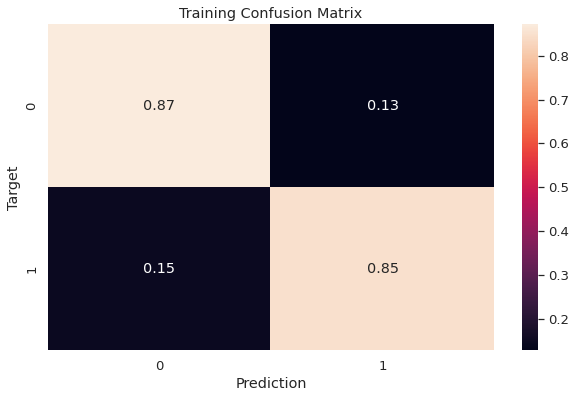

In [478]:
train_preds = predict_and_plot(X_train, Y_train, 'Training')

Accuracy: 80.70%


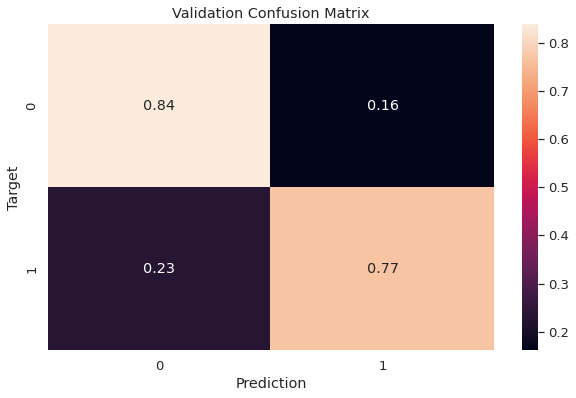

In [479]:
val_preds = predict_and_plot(X_val,Y_val, 'Validation')

In [480]:
Y_train

114    0
150    0
263    0
85     0
37     1
      ..
122    1
182    1
241    0
54     0
230    1
Name: Heart Disease, Length: 159, dtype: int64

Train set accuracy: 86.16%
Validation set Accuracy: 80.70%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.80      0.77      0.78        26

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

roc auc score: 0.80


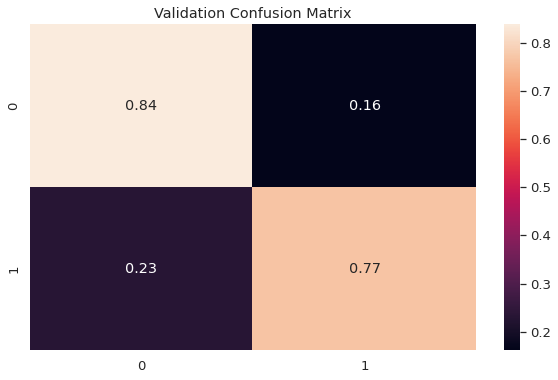

In [481]:
model_performance(model, X_train, Y_train , X_val, Y_val)

####Comparing with a dumb model i.e, random answer generator 

In [482]:
def random_guess(inputs):
    return np.random.choice(['Absence', 'Presence'], len(inputs))

In [483]:
accuracy_score(test_target, random_guess(X_test))

0.48148148148148145

accuracy of our model is so much better than a dumb model which randomly guesses a choice.

#KNN

In [484]:
from sklearn.neighbors import KNeighborsClassifier

In [485]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)
val_pred1 = model_knn.predict(X_val)
print(accuracy_score(Y_val,val_pred1))

0.8070175438596491


Train set accuracy: 86.16%
Validation set Accuracy: 80.70%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.78      0.81      0.79        26

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57

roc auc score: 0.81


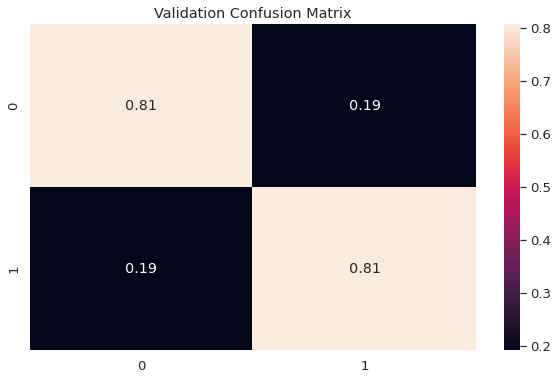

In [486]:
model_performance(model_knn,X_train,Y_train,X_val,Y_val)

In [487]:
def test_params_knn(**params):
    model=KNeighborsClassifier( **params).fit(X_train, Y_train)
    target_preds = model.predict(X_train)
    val_preds =model.predict(X_val)
    train_accuracy = accuracy_score(Y_train, train_preds)
    val_accuracy = accuracy_score(Y_val, val_preds)
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100)) 
    print('roc auc score: {:.2f}'.format(roc_auc_score(Y_val, val_preds)))  


In [488]:
n_neighbors = 10

In [489]:
test_params_knn(n_neighbors=10)

Train set accuracy: 86.16%
Validation set Accuracy: 78.95%
roc auc score: 0.78


In [490]:
test_params_knn(n_neighbors=2)

Train set accuracy: 86.16%
Validation set Accuracy: 78.95%
roc auc score: 0.78


In [491]:
test_params_knn(n_neighbors=5)

Train set accuracy: 86.16%
Validation set Accuracy: 80.70%
roc auc score: 0.81


In [492]:
test_params_knn(n_neighbors=7)

Train set accuracy: 86.16%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [493]:
test_params_knn(n_neighbors=8)

Train set accuracy: 86.16%
Validation set Accuracy: 78.95%
roc auc score: 0.78


We can Observe that n_neighbor=7 is better option

In [494]:
model_knn_best=KNeighborsClassifier(n_neighbors=7)

Train set accuracy: 86.16%
Validation set Accuracy: 82.46%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.81      0.81      0.81        26

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57

roc auc score: 0.82


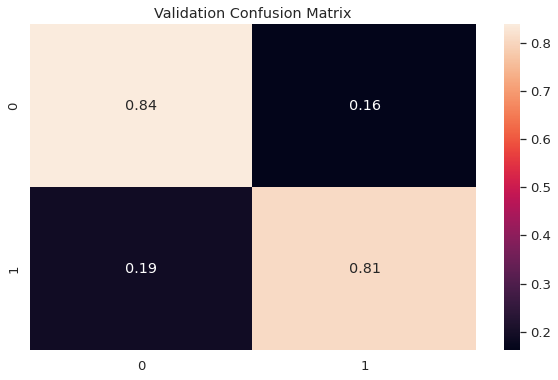

In [495]:
model_performance(model_knn_best,X_train, Y_train, X_val, Y_val)

Naive Bayes

In [496]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

In [497]:
model_nb= GaussianNB() # get instance of model
model_nb.fit(X_train, Y_train) # Train/Fit model

GaussianNB()

In [498]:
val_pred2 =model_nb.predict(X_val)
print(classification_report(Y_val,val_pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.81      0.81      0.81        26

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



Train set accuracy: 86.16%
Validation set Accuracy: 82.46%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.81      0.81      0.81        26

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57

roc auc score: 0.82


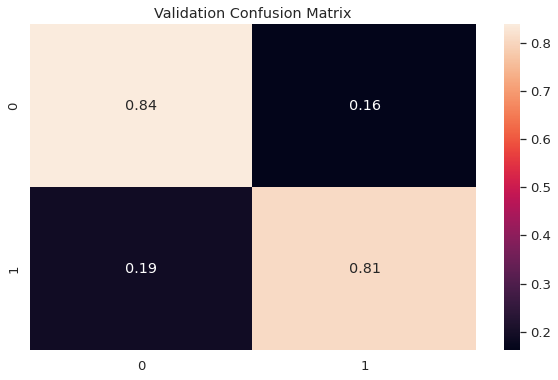

In [499]:
model_performance(model_nb,X_train,Y_train,X_val,Y_val)

#Random Forest

In [500]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model_rb = RandomForestClassifier()# get instance of model
model_rb.fit(X_train, Y_train) # Train/Fit model 

val_pred3 = model_rb.predict(X_val) # get y predictions
print(classification_report(Y_val, val_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.91      0.77      0.83        26

    accuracy                           0.86        57
   macro avg       0.87      0.85      0.86        57
weighted avg       0.87      0.86      0.86        57



Train set accuracy: 86.16%
Validation set Accuracy: 77.19%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79        31
           1       0.76      0.73      0.75        26

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57

roc auc score: 0.77


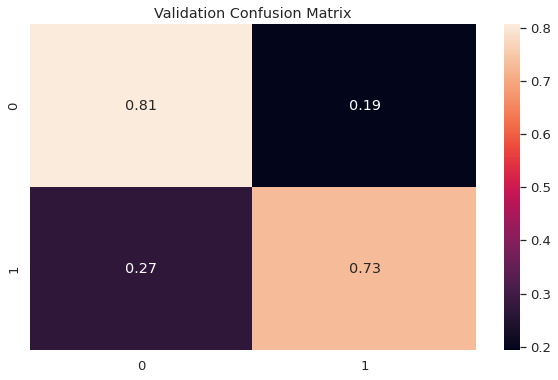

In [501]:
model_performance(model_rb,X_train,Y_train,X_val,Y_val)

###Hyperparameter Tuning for Random Forest

In [502]:
# function to quickly evaluate effect of different hyperparameters
def test_params_rfc(**params):
    model = RandomForestClassifier(n_jobs = -1, random_state = 42, **params).fit(X_train, Y_train)
    train_accuracy = model.score(X_train, Y_train)
    val_accuracy = model.score(X_val, Y_val)
    roc_auc_score_lr = roc_auc_score(Y_val, model.predict(X_val))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

In [503]:
test_params_rfc(n_estimators=2)

Train set accuracy: 89.94%
Validation set Accuracy: 82.46%
roc auc score: 0.81


In [504]:
test_params_rfc(n_estimators=5)

Train set accuracy: 97.48%
Validation set Accuracy: 78.95%
roc auc score: 0.78


In [505]:
test_params_rfc(n_estimators=10)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [506]:
test_params_rfc(n_estimators=20)

Train set accuracy: 99.37%
Validation set Accuracy: 85.96%
roc auc score: 0.86


In [507]:
test_params_rfc(n_estimators=35)

Train set accuracy: 100.00%
Validation set Accuracy: 82.46%
roc auc score: 0.83


In [508]:
test_params_rfc(n_estimators=50)

Train set accuracy: 100.00%
Validation set Accuracy: 84.21%
roc auc score: 0.84


In [509]:
test_params_rfc(n_estimators=100)

Train set accuracy: 100.00%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [510]:
test_params_rfc(n_estimators=200)

Train set accuracy: 100.00%
Validation set Accuracy: 80.70%
roc auc score: 0.80


max_depth

In [511]:
test_params_rfc(n_estimators = 20, max_depth = 2)

Train set accuracy: 86.16%
Validation set Accuracy: 75.44%
roc auc score: 0.75


In [512]:
test_params_rfc(n_estimators = 20, max_depth = 3)

Train set accuracy: 90.57%
Validation set Accuracy: 80.70%
roc auc score: 0.81


In [513]:
test_params_rfc(n_estimators = 20, max_depth = 4)

Train set accuracy: 91.19%
Validation set Accuracy: 77.19%
roc auc score: 0.77


In [514]:
test_params_rfc(n_estimators = 20, max_depth = 5)

Train set accuracy: 96.23%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [515]:
test_params_rfc(n_estimators = 10, max_depth = 7)

Train set accuracy: 99.37%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [516]:
test_params_rfc(n_estimators = 200, max_depth = 7)

Train set accuracy: 99.37%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [517]:
test_params_rfc(n_estimators = 20, max_depth = 7)

Train set accuracy: 99.37%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [518]:
test_params_rfc(n_estimators = 20, max_depth = 8)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.83


In [519]:
test_params_rfc(n_estimators = 20, max_depth = 9)

Train set accuracy: 99.37%
Validation set Accuracy: 85.96%
roc auc score: 0.86


In [520]:
test_params_rfc(n_estimators = 20, max_depth = 10)

Train set accuracy: 99.37%
Validation set Accuracy: 84.21%
roc auc score: 0.84


max_leaf_nodes

In [521]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 32)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [522]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 64)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [523]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 128)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [524]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 256)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [525]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 2**8)

Train set accuracy: 99.37%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [526]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 2)

Train set accuracy: 95.60%
Validation set Accuracy: 77.19%
roc auc score: 0.77


In [527]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 4)

Train set accuracy: 95.60%
Validation set Accuracy: 78.95%
roc auc score: 0.79


In [528]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 8)

Train set accuracy: 88.68%
Validation set Accuracy: 78.95%
roc auc score: 0.79


min_split

In [529]:
test_params_rfc(n_estimators = 20, min_samples_split = 2)

Train set accuracy: 99.37%
Validation set Accuracy: 85.96%
roc auc score: 0.86


In [530]:
test_params_rfc(n_estimators = 20, min_samples_split = 4)

Train set accuracy: 98.74%
Validation set Accuracy: 84.21%
roc auc score: 0.84


In [531]:
test_params_rfc(n_estimators = 20, min_samples_split = 8)

Train set accuracy: 96.23%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [532]:
test_params_rfc(n_estimators = 20,max_depth=9, min_samples_split=4)

Train set accuracy: 98.74%
Validation set Accuracy: 84.21%
roc auc score: 0.84


In [533]:
test_params_rfc(n_estimators = 20,max_depth=9, min_samples_split=2)

Train set accuracy: 99.37%
Validation set Accuracy: 85.96%
roc auc score: 0.86


In [534]:
test_params_rfc(n_estimators = 20, min_samples_split = 50)

Train set accuracy: 84.28%
Validation set Accuracy: 78.95%
roc auc score: 0.79


In [535]:
test_params_rfc(n_estimators = 20, min_samples_split = 25)

Train set accuracy: 91.82%
Validation set Accuracy: 78.95%
roc auc score: 0.79


In [536]:
model_rfc_best = RandomForestClassifier(n_jobs = -1, n_estimators = 20,max_depth=7,min_samples_split = 2)

Train set accuracy: 86.16%
Validation set Accuracy: 82.46%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.83      0.77      0.80        26

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

roc auc score: 0.82


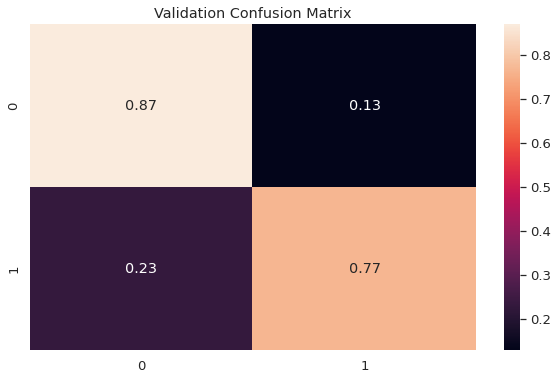

In [537]:
model_performance(model_rfc_best, X_train, Y_train, X_val, Y_val)

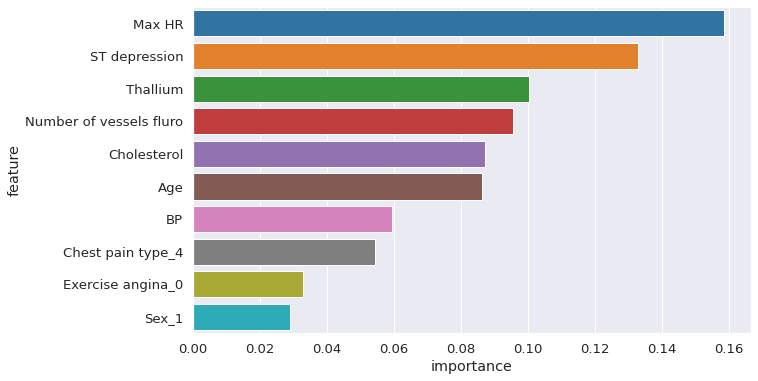

In [538]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rfc_best.feature_importances_
})
sns.barplot(x = 'importance', y = 'feature', data = importance_df.sort_values('importance', ascending = False).head(10));

#XGBoost Classifier

In [539]:
from xgboost import XGBClassifier

In [540]:
model_xgb = XGBClassifier( n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')

Train set accuracy: 86.16%
Validation set Accuracy: 80.70%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.80      0.77      0.78        26

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

roc auc score: 0.80


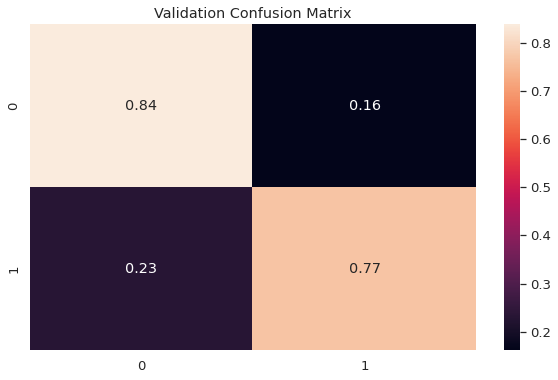

In [541]:
model_performance(model, X_train, Y_train, X_val, Y_val)

#### Hyperparameter Tuning for XGBClassifier

In [542]:
# function to quickly evaluate effect of different hyperparameters
def test_params_xgbc(**params):
    model = XGBClassifier(random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss', **params).fit(X_train, Y_train)
    train_accuracy = model.score(X_train, Y_train)
    val_accuracy = model.score(X_val, Y_val)
    roc_auc_score_lr = roc_auc_score(Y_val, model.predict(X_val))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

In [543]:
test_params_xgbc(n_estimators = 10)

Train set accuracy: 91.82%
Validation set Accuracy: 80.70%
roc auc score: 0.81


In [544]:
test_params_xgbc(n_estimators = 20)

Train set accuracy: 93.71%
Validation set Accuracy: 77.19%
roc auc score: 0.77


In [545]:
test_params_xgbc(n_estimators = 30)

Train set accuracy: 94.97%
Validation set Accuracy: 77.19%
roc auc score: 0.77


In [546]:
test_params_xgbc(n_estimators = 50)

Train set accuracy: 95.60%
Validation set Accuracy: 78.95%
roc auc score: 0.78


max_depth

In [547]:
test_params_xgbc(n_estimators = 10, max_depth = 2)

Train set accuracy: 89.94%
Validation set Accuracy: 78.95%
roc auc score: 0.79


In [548]:
test_params_xgbc(n_estimators = 10, max_depth = 3)

Train set accuracy: 91.82%
Validation set Accuracy: 80.70%
roc auc score: 0.81


In [549]:
test_params_xgbc(n_estimators = 10, max_depth = 10)

Train set accuracy: 92.45%
Validation set Accuracy: 73.68%
roc auc score: 0.74


In [550]:
test_params_xgbc(n_estimators = 10, max_depth = 20)

Train set accuracy: 92.45%
Validation set Accuracy: 73.68%
roc auc score: 0.74


learning_rate

In [551]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.2)

Train set accuracy: 93.71%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [552]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.3)

Train set accuracy: 94.34%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [553]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.3)

Train set accuracy: 94.34%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [554]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.4)

Train set accuracy: 95.60%
Validation set Accuracy: 80.70%
roc auc score: 0.80


In [555]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.5)

Train set accuracy: 96.23%
Validation set Accuracy: 78.95%
roc auc score: 0.78


In [556]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.6)

Train set accuracy: 98.11%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [557]:
test_params_xgbc(n_estimators = 50, learning_rate = 0.6)

Train set accuracy: 100.00%
Validation set Accuracy: 82.46%
roc auc score: 0.82


In [558]:
model_xgbc_best = XGBClassifier(n_estimators = 10, learning_rate = 0.6, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')

Train set accuracy: 86.16%
Validation set Accuracy: 82.46%
Validation Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.83      0.77      0.80        26

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

roc auc score: 0.82


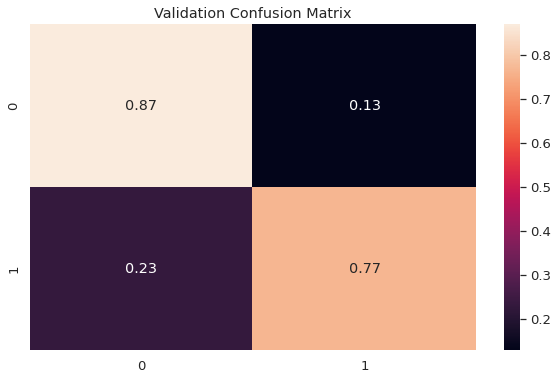

In [559]:
model_performance(model_xgbc_best, X_train, Y_train, X_val, Y_val)

###Comparing different models on Test Data

In [560]:
model_lr=LogisticRegression(solver='liblinear',)
model_nb= GaussianNB() 
model_knn_best=KNeighborsClassifier(n_neighbors=7)
model_rfc_best = RandomForestClassifier(n_jobs = -1, n_estimators = 20,max_depth=7,min_samples_split = 2)
model_xgbc_best = XGBClassifier(n_estimators = 10, learning_rate = 0.6, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')


In [561]:
models = [model_lr, model_nb, model_knn_best, model_rfc_best, model_xgbc_best]
accuracy_scores = []
roc_auc_scores = []

In [562]:
for model in models:
  model.fit(X_train, Y_train)
  test_preds = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test, test_preds)
  roc_auc_score_test = roc_auc_score(Y_test, test_preds)
  accuracy_scores.append(round(test_accuracy*100, 2))
  roc_auc_scores.append(round(roc_auc_score_test, 3))

In [563]:
test_results_df = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Naive Bayes', 'KNN', 'Random Forest Classifier', 'XGBoost Classifier'],
    'Accuracy': accuracy_scores,
    'roc_auc_score': roc_auc_scores
})

In [564]:
test_results_df

,Model,Accuracy,roc_auc_score
0,Logistic Regression,87.04,0.842
1,Naive Bayes,85.19,0.827
2,KNN,83.33,0.803
3,Random Forest Classifier,85.19,0.827
4,XGBoost Classifier,85.19,0.853
